#voting vs individual model

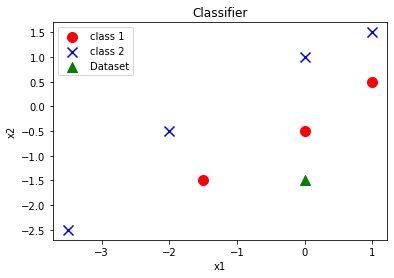

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0, -0.5], [-1.5, -1.5], [1, 0.5], [-3.5, -2.5], [0, 1], [1, 1.5], [-2, -0.5]])
y = np.array([1, 1, 1, 2, 2, 2, 2])
x_new = [0, -1.5]
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=100, marker='o', c='r', label="class 1")
plt.scatter(X[y == 2, 0], X[y == 2, 1], s=100, marker='x', c='b', label="class 2")
plt.scatter(x_new[0], x_new[1], s=100, marker='^', c='g', label="Dataset")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Classifier")
plt.legend()
plt.show()

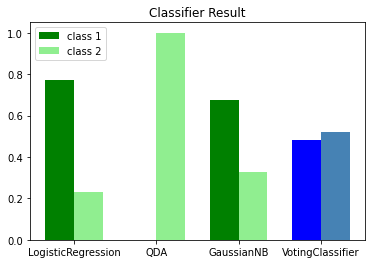

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier

model1 = LogisticRegression(random_state=1)
model2 = QuadraticDiscriminantAnalysis()
model3 = GaussianNB()
ensemble = VotingClassifier(estimators=[('lr', model1), ('qda', model2), ('gnb', model3)], voting='soft')

probas = [c.fit(X, y).predict_proba([x_new]) for c in (model1, model2, model3, ensemble)]
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]

ind = np.arange(4)
width = 0.35  # bar width
p1 = plt.bar(ind, np.hstack(([class1_1[:-1], [0]])), width, color='green')
p2 = plt.bar(ind + width, np.hstack(([class2_1[:-1], [0]])), width, color='lightgreen')
p3 = plt.bar(ind, [0, 0, 0, class1_1[-1]], width, color='blue')
p4 = plt.bar(ind + width, [0, 0, 0, class2_1[-1]], width, color='steelblue')

plt.xticks(ind + 0.5 * width, ['LogisticRegression', 'QDA', 'GaussianNB', 'VotingClassifier'])
# plt.ylim([0, 1.1])
plt.title('Classifier Result')
plt.legend([p1[0], p2[0]], ['class 1', 'class 2'], loc='upper left')
plt.show()

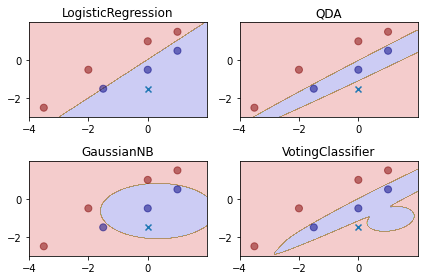

In [4]:
from itertools import product
import matplotlib as mpl

x_min, x_max = -4, 2
y_min, y_max = -3, 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.005),
                     np.arange(y_min, y_max, 0.005))
f, axarr = plt.subplots(2, 2)
for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [model1, model2, model3, ensemble],
                        ['LogisticRegression', 'QDA', 'GaussianNB', 'VotingClassifier']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.2, cmap=mpl.cm.jet)
    axarr[idx[0], idx[1]].scatter(
        X[:, 0], X[:, 1], c=y, alpha=0.5, s=50, cmap=mpl.cm.jet)
    axarr[idx[0], idx[1]].scatter(x_new[0], x_new[1], marker='x')
    axarr[idx[0], idx[1]].set_title(tt)
plt.tight_layout()
plt.show()

In [5]:
product([0, 1], [0, 1])

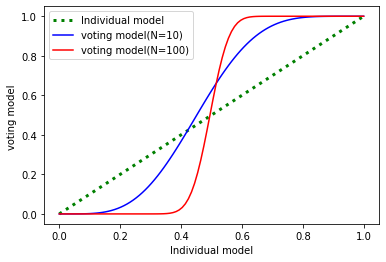

In [0]:
import scipy as sp

def total_error(p, N):
    te = 0.0
    for k in range(int(np.ceil(N/2)), N + 1):
        te += sp.special.comb(N, k) * p**k * (1-p)**(N-k)
    return te

x = np.linspace(0, 1, 100)
plt.plot(x, x, 'g:', lw=3, label="Individual model")
plt.plot(x, total_error(x, 10), 'b-', label="voting model(N=10)")
plt.plot(x, total_error(x, 100), 'r-', label="voting model(N=100)")
plt.xlabel("Individual model")
plt.ylabel("voting model ")
plt.legend(loc=0)
plt.show()

#bagging

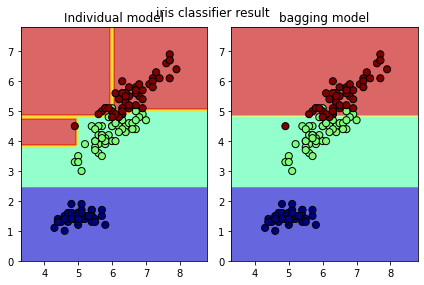

In [0]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

iris = load_iris()
X, y = iris.data[:, [0, 2]], iris.target

model1 = DecisionTreeClassifier(max_depth=10, random_state=0).fit(X, y)
model2 = BaggingClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=0, oob_score=True, ).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
plt.subplot(121)
Z1 = model1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z1, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("Individual model")
plt.subplot(122)
Z2 = model2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z2, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("bagging model")
plt.suptitle("iris classifier result")
plt.tight_layout()
plt.show()

In [0]:
model2.estimator_params

()

#RandomForestClassifier

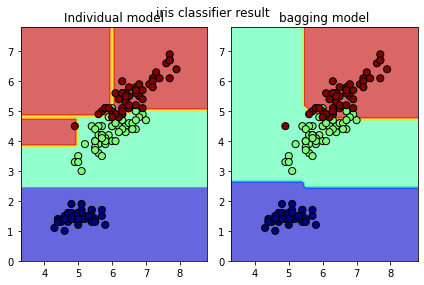

In [0]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
X, y = iris.data[:, [0, 2]], iris.target

model1 = DecisionTreeClassifier(max_depth=10, random_state=0).fit(X, y)
model2 = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=0).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
plt.subplot(121)
Z1 = model1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z1, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("Individual model")
plt.subplot(122)
Z2 = model2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z2, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("bagging model")
plt.suptitle("iris classifier result")
plt.tight_layout()
plt.show()

#ExtraTreesClassifier

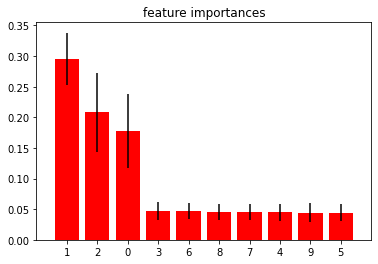

In [0]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

X, y = make_classification(n_samples=1000, n_features=10, n_informative=3, n_redundant=0, n_repeated=0,
                           n_classes=2, random_state=0, shuffle=False)

forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X, y)

importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.title("feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

#Titanic

In [0]:
import pandas as pd
import numpy as np

In [0]:
x = np.load('./titanic_X_train.ndarray')
y = np.load('./titanic_y_train.ndarray')
# type(x), x, type(y), y

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, \
                                                    test_size=0.2, random_state=77)

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

In [0]:
clflog = LogisticRegression(random_state=1)
clfdt = DecisionTreeClassifier(random_state=1)
clfgn = GaussianNB()
eclf_h = VotingClassifier(estimators = [('lr',clflog), ('rf',clfdt),('gnb',clfgn)], \
                 voting='hard').fit(x_train, y_train)
eclf_s = VotingClassifier(estimators = [('lr',clflog), ('rf',clfdt),('gnb',clfgn)], \
                 voting='soft').fit(x_train, y_train)
eclf_h1 = VotingClassifier(estimators = [('lr',clflog), ('rf',clfdt)],voting='hard')
eclf_s1 = VotingClassifier(estimators = [('lr',clflog), ('rf',clfdt)],voting='soft')

In [0]:
eclf_h.score(x_train, y_train), eclf_s.score(x_train, y_train)

(0.869198312236287, 0.8790436005625879)

In [0]:
eclf_h.fit(x_train, y_train).score(x_test, y_test), eclf_s.fit(x_train, y_train).score(x_test, y_test)

(0.8539325842696629, 0.8595505617977528)

In [0]:
models = [clflog, clfdt, clfgn, eclf_h, eclf_s, eclf_h1, eclf_s1]

In [0]:
for model in models:
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    score = model.score(x_test, y_test)
    # print(model)
    print(score)
    print('-'*20)

0.8651685393258427
--------------------
0.8314606741573034
--------------------
0.7696629213483146
--------------------
0.8539325842696629
--------------------
0.8595505617977528
--------------------
0.8539325842696629
--------------------
0.8314606741573034
--------------------


In [0]:
# eclf_h.named_estimators_

In [0]:
eclf_h1 = VotingClassifier(estimators = [('lr',clflog), ('dt',clfdt)],voting='hard')

In [0]:
c_params = [0.1, 5.0, 7.0, 10.0, 15.0, 20.0, 100.0]

params = {
    'lr__solver':['liblinear'], 'lr__penalty':['l2'], 'lr__C':c_params,
    # 'lr__solver':['liblinear','lbfgs','saga'], 'lr__penalty':['l1','l2'], 'lr__C':c_params,
    'dt__criterion':['gini','entropy'], 
    'dt__max_depth':[10,8,7,6,5,4,3,2],
    'dt__min_samples_leaf':[1,2,3,4,5,6,7,8,9]
}

In [0]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = eclf_h1, param_grid=params, cv=5)
grid = grid.fit(x,y)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 

In [0]:
grid.best_score_

In [0]:
grid.best_params_

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, grid.predict(x_test)))